# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [12]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from random import gauss
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits import mplot3d
import sklearn.metrics as metrics
import statsmodels.api as sm
import math


In [13]:
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [14]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [15]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

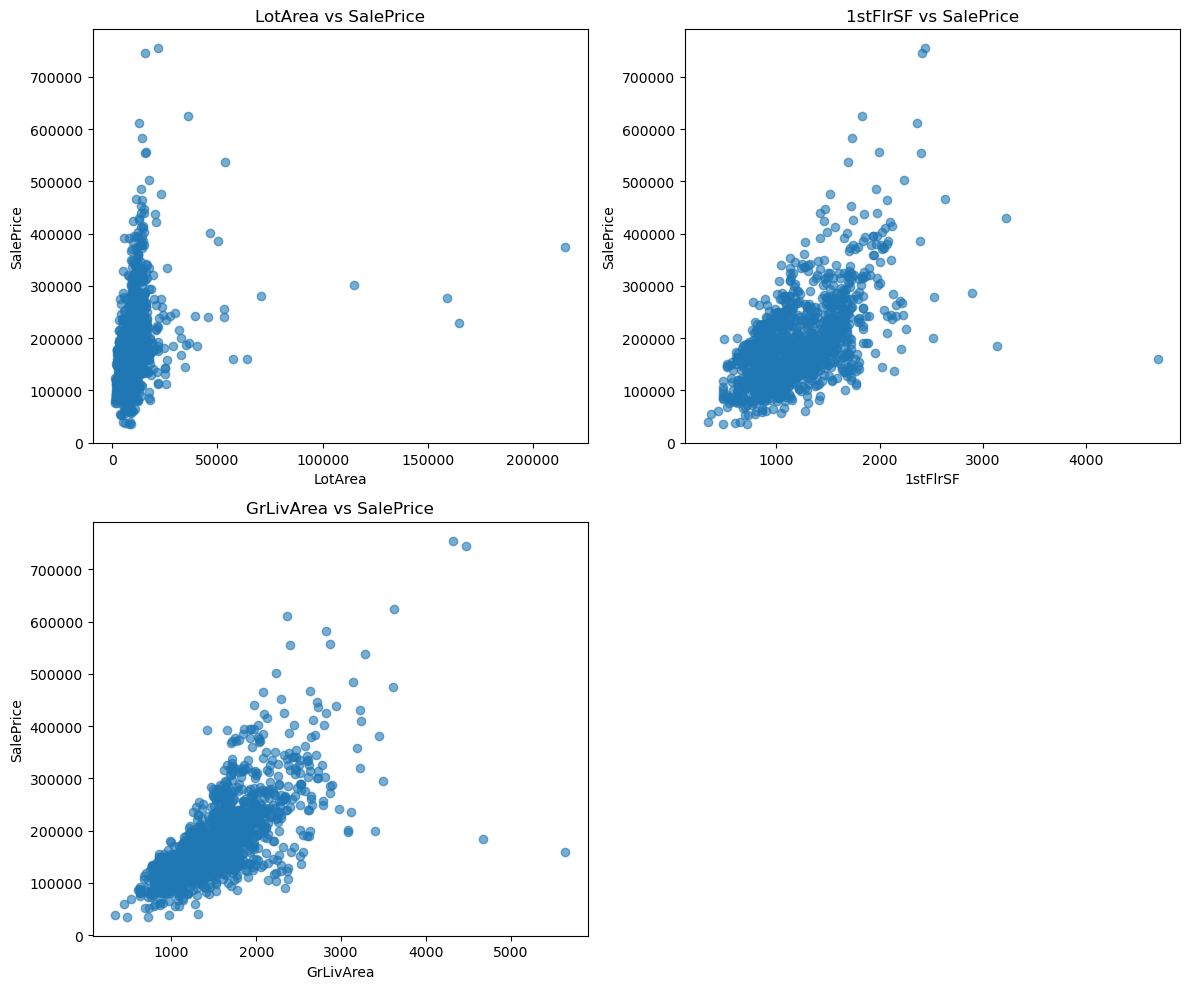

In [16]:
target = "SalePrice"
features = [col for col in ames_subset.columns if col != target]

n = len(features)
rows = math.ceil(n / 2)  
fig, axes = plt.subplots(rows, 2, figsize=(12, 5 * rows))

for i, col in enumerate(features):
    ax = axes.flat[i]
    ax.scatter(ames_subset[col], ames_subset[target], alpha=0.6)
    ax.set_xlabel(col)
    ax.set_ylabel(target)
    ax.set_title(f"{col} vs {target}")

# Hide any unused subplots
for j in range(i + 1, len(axes.flat)):
    axes.flat[j].set_visible(False)

plt.tight_layout()
plt.show()


In [17]:
# Your written answer here - do these seem like good candidates for linear regression?
"""
Only two are good candidates of linear regression, thats GrLivArea, 1stFLSF
"""

'\nOnly two are good candidates of linear regression, thats GrLivArea, 1stFLSF\n'

In [18]:
ames_subset.isna().any()

LotArea      False
1stFlrSF     False
GrLivArea    False
SalePrice    False
dtype: bool

In [19]:
ames_subset.corr()["SalePrice"]

LotArea      0.263843
1stFlrSF     0.605852
GrLivArea    0.708624
SalePrice    1.000000
Name: SalePrice, dtype: float64

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [20]:
# Your code here - define y and baseline X
y = ames_subset['SalePrice']
X_baseline = ames_subset[['GrLivArea']]

In [21]:
# Your code here - import StatsModels, fit baseline model, display results
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Mon, 02 Feb 2026   Prob (F-statistic):          4.52e-223
Time:                        13:06:47   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.0



### 📊 Interpretation of OLS Regression Results

The fitted regression model is:

$$
\text{SalePrice} = 18,570 + 107.13 \times \text{GrLivArea}
$$

The model is statistically significant overall, as indicated by the very large F-statistic (1471) and its corresponding p-value (< 0.001). This confirms that *GrLivArea* is a useful predictor of house prices.

Both coefficients are also statistically significant. The intercept (≈18,570) has a p-value < 0.001, though its practical interpretation is limited since a house with 0 square feet of living area is unrealistic. The slope for *GrLivArea* (107.13, p < 0.001) shows that, on average, each additional square foot of above-ground living area increases the sale price by about **\$107**, holding all else constant.

The R-squared value of 0.502 indicates that approximately **50.2% of the variability in SalePrice is explained by GrLivArea alone**. While this demonstrates a strong relationship, it also suggests that other factors (such as location, condition, and amenities) play a substantial role in determining house prices and would need to be included in a more comprehensive model.


## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [22]:
ames_subset.columns

Index(['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice'], dtype='object')

In [23]:
# Your code here - define X
X_second = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]
X_second

,LotArea,1stFlrSF,GrLivArea
Id,,,
1,8450,856,1710
2,9600,1262,1262
3,11250,920,1786
4,9550,961,1717
5,14260,1145,2198
...,...,...,...
1456,7917,953,1647
1457,13175,2073,2073
1458,9042,1188,2340


In [24]:
# Your code here - fit model and display results

second_model = sm.OLS(y, sm.add_constant(X_second))
second_results = second_model.fit()
print(second_results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Mon, 02 Feb 2026   Prob (F-statistic):          1.57e-262
Time:                        13:06:47   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0


---

### 📊 Model Equation

$$
\text{SalePrice} = -14,310 + 0.284 \times \text{LotArea} + 60.29 \times \text{1stFlrSF} + 80.61 \times \text{GrLivArea}
$$

---

### Model Significance

* **F-statistic = 630.3**, with **p-value < 0.001 (1.57e-262)** → the model as a whole is highly statistically significant.
* **R² = 0.565** → the predictors together explain about **56.5% of the variation in house prices**.
* That’s an improvement from the single-variable model (R² = 0.502 with only *GrLivArea*), showing that adding predictors improved explanatory power.

---

###  Coefficients

* **Intercept (const = -14,310, p = 0.003)**

  * Statistically significant, but practically not interpretable (a house with 0 lot area, 0 1st floor size, and 0 living area doesn’t exist).

* **LotArea (coef = 0.2841, p = 0.051)**

  * This is **borderline significant** (just above 0.05).
  * Interpretation: for every additional square foot of lot size, the price increases by about **\$0.28**, *holding other variables constant*.
  * The effect is small and may not be reliable.

* **1stFlrSF (coef = 60.29, p < 0.001)**

  * Highly significant.
  * Interpretation: each additional square foot on the first floor adds about **\$60** to house price, holding lot size and total living area constant.

* **GrLivArea (coef = 80.61, p < 0.001)**

  * Highly significant.
  * Interpretation: each extra square foot of above-ground living area adds about **\$81**, holding the other variables constant.

---

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

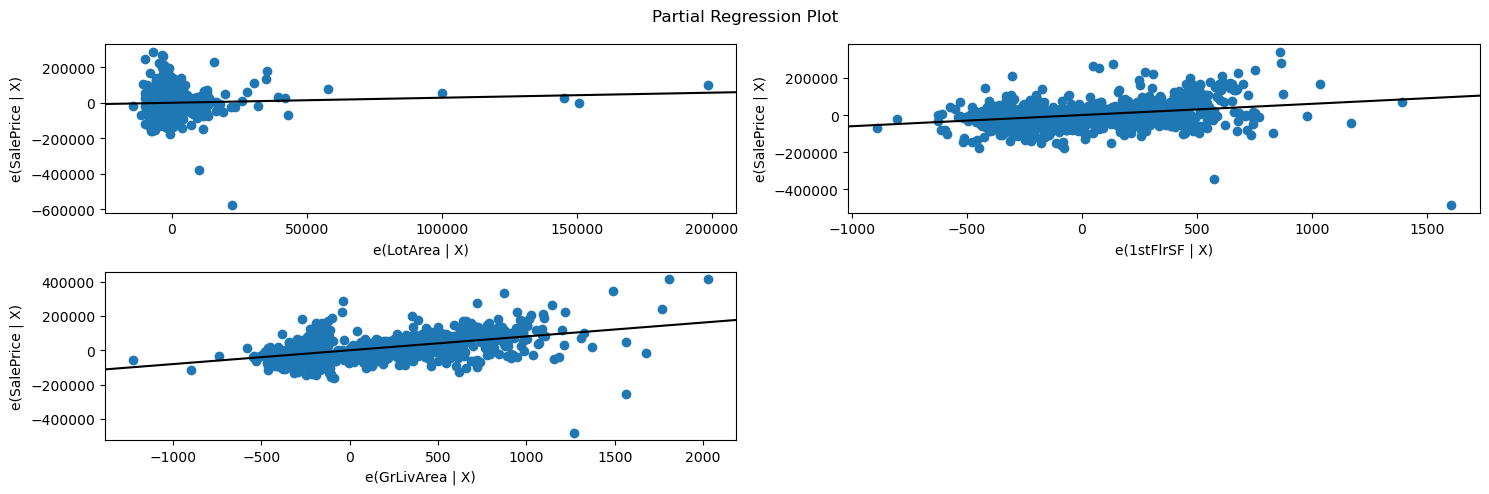

In [30]:
# Your code here - create partial regression plots for each predictor
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(second_results, exog_idx=['LotArea', '1stFlrSF', 'GrLivArea'], fig=fig)
plt.tight_layout()
plt.show()

In [26]:
# Your written answer here - explain what you see, and how this relates
# to what you saw in Step 1. What do you notice?

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [27]:
# Your code here - import linear regression from scikit-learn and create and fit model
sklearn_baseline_model = LinearRegression()
sklearn_baseline_model.fit(X_baseline,y)

print(f"""
StatsModels R-Squared:    {baseline_results.rsquared}
scikit-learn R-Squared:   {sklearn_baseline_model.score(X_baseline, y)}

StatsModels intercept:    {baseline_results.params["const"]}
scikit-learn intercept:   {sklearn_baseline_model.intercept_}

StatsModels coefficient:  {baseline_results.params["GrLivArea"]}
scikit-learn coefficient: {sklearn_baseline_model.coef_[0]}
""")


StatsModels R-Squared:    0.5021486502718042
scikit-learn R-Squared:   0.5021486502718042

StatsModels intercept:    18569.025856487176
scikit-learn intercept:   18569.025856487395

StatsModels coefficient:  107.13035896582527
scikit-learn coefficient: 107.13035896582508



In [28]:
# Your code here - compare R-Squared

In [29]:
# Your code here - compare intercept and coefficients

## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.